# CNN_Fashion_Mnist

가로 28px, 세로 28px 크기의 의류 이미지

훈련데이터 6만건, 검증데이터 1만건

| Label | Description |
|---|---|
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## #01. 패키지 설치

In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,BatchNormalization, MaxPool2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data

## #02. 데이터셋 준비

In [3]:
(x_train, y_train),(x_test, y_test) = load_data()
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_test.shape} 레이블 {y_test.shape}')

4422102/4422102 [==============================] - 1s 0us/step
훈련 데이터 (60000, 28, 28) 레이블 (60000,)
검증 데이터 (10000, 28, 28) 레이블 (10000,)


## #03. 데이터 전처리
결측치 등의 데이터 이상점이 없는 예제 데이터이므로 생략

## #04. 탐색적데이터 분석

### 임의의 샘플값 확인

In [4]:
for i in x_train[1]:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000001000000000000041188103054048043087168133016000000000000000000000000
000000000001000000000049136219216228236255255255255217215254231160045000000000000000
000000000000000014176222224212203198196200215204202201201201209218224164000000000000
000000000000000188219200198202198199199201196198198200200200200201200225041000000000
000000000000051219199203203212238248250245249246247252248235207203203222140000000000
000000000000116226206204207204101075047073048050045051063113222202206220224000000000
000000000000200222209203215200000070098000103059068071049000219206214210250038000000
000000000000247218212210215214000254243139255174251255205000215217214208220095000000
000000000045226214214215224205000042035060016017012013070000189216212206212156000000
000000000164235214211220216201052071089094083078070076092087206207222213219208000000
000000000106187223237248211198252250248245248252253250252239201212225215193113000000
00000000000000001705415922219320819219720020020020020120319521016

### 종속변수 이름 정의

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 샘플에 대한 종속변수 확인

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
y = y_train[1]
yname = class_names[y]
print(y, ":", yname)

0 : T-shirt/top


### 데이터 그려보기

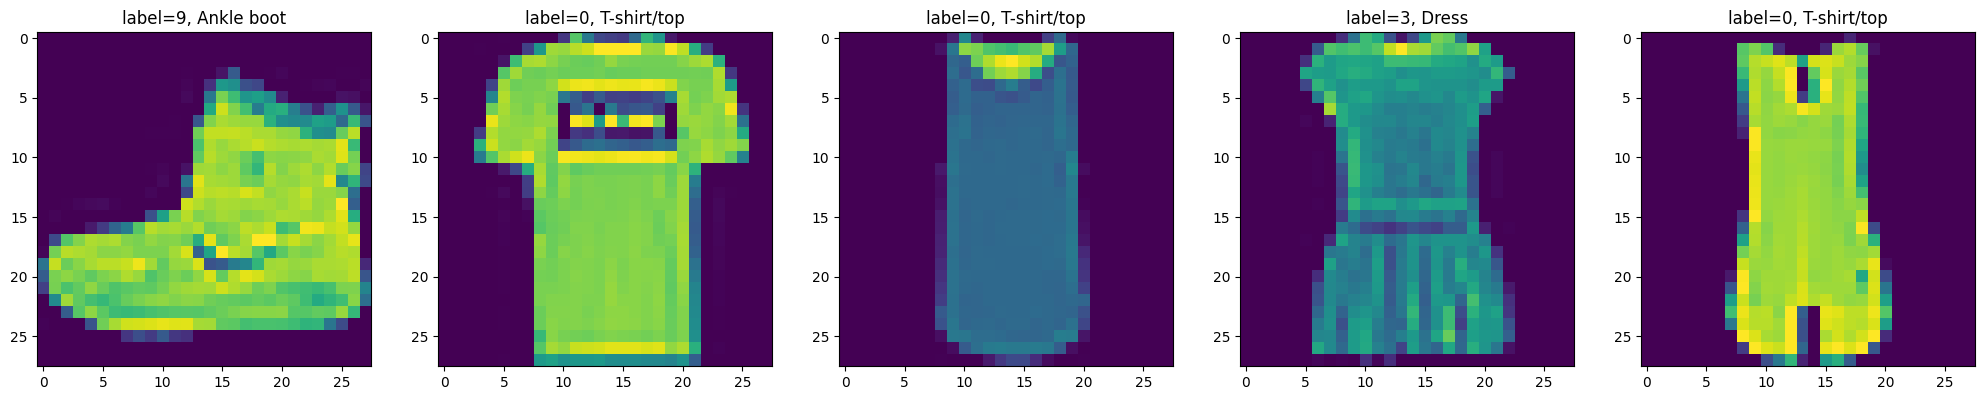

In [8]:
fig, ax = plt.subplots(1,5, figsize=(25,5), dpi=100)

for i in range(0, len(ax)):
    train = x_train[i]
    label = y_train[i]
    ax[i].imshow(train)
    ax[i].set_title("label=%d, %s" % (label, class_names[label]))


## #05. 데이터셋 분리
### 랜덤시드 고정

In [9]:
np.random.seed(777)

### 훈련데이터와 레이블 구분
처음부터 데이터셋이 구분되어 있으므로 생략

### 훈련데이터와 검증데이터 분할
처음부터 데이터 셋이 구분되어 있으므로 생략

### 레이블에 대한 one-hot-encoding

In [10]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## #06. 모델 생성

### 훈련 데이터의 차수 확인

In [11]:
x_train.shape # 2차원 matrix

(60000, 28, 28)

### 훈련, 검증용 독립변수(이미지)의 차수 재설정(3차원배열로!)

In [12]:
x_train_reshape = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test_reshape = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(f'훈련데이터 {x_train_reshape.shape} / 검증데이터 {x_test_reshape.shape}')

훈련데이터 (60000, 28, 28, 1) / 검증데이터 (10000, 28, 28, 1)


### 모델 정의

In [17]:
model = Sequential()
#step1---------------------------#
# Convolution
model.add(Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
# BatchNormalization
model.add(BatchNormalization())
# MaxPool
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#step2---------------------------#
# Convolution
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
# BatchNormalization
model.add(BatchNormalization())
# MaxPool
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

#step3----------------------------#
model.add(Flatten())

#step4----------------------------#
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

#---------------------------------#
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 14, 14, 64)       

### 학습하기

In [20]:
start = dt.datetime.now()

result = model.fit(x_train_reshape, y_train_one_hot, epochs=500, validation_data=(x_test_reshape, y_test_one_hot),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1),
                              ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.0001)])

end = dt.datetime.now()

delta = end - start

print("총 소요시간 : %d(초)" % delta.seconds)

Epoch 1/500
1875/1875 [==============================] - 61s 32ms/step - loss: 0.4137 - acc: 0.8527 - val_loss: 0.3576 - val_acc: 0.8702 - lr: 0.0010
Epoch 2/500
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2883 - acc: 0.8941 - val_loss: 0.3221 - val_acc: 0.8862 - lr: 0.0010
Epoch 3/500
1875/1875 [==============================] - 65s 34ms/step - loss: 0.2536 - acc: 0.9051 - val_loss: 0.2766 - val_acc: 0.9046 - lr: 0.0010
Epoch 4/500
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2317 - acc: 0.9136 - val_loss: 0.2602 - val_acc: 0.9088 - lr: 0.0010
Epoch 5/500
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2107 - acc: 0.9212 - val_loss: 0.2477 - val_acc: 0.9144 - lr: 0.0010
Epoch 6/500
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1937 - acc: 0.9268 - val_loss: 0.2482 - val_acc: 0.9171 - lr: 0.0010
Epoch 7/500
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1796 - acc: 0.9324 

## #07. 학습모델 평가

In [21]:
# 결과 프레임 만들기
result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
result_df

,loss,acc,val_loss,val_acc,lr,epochs
0,0.413715,0.852717,0.357562,0.8702,0.0010,1
1,0.288295,0.894100,0.322062,0.8862,0.0010,2
2,0.253637,0.905133,0.276615,0.9046,0.0010,3
3,0.231710,0.913633,0.260235,0.9088,0.0010,4
4,0.210722,0.921150,0.247690,0.9144,0.0010,5
5,0.193717,0.926800,0.248225,0.9171,0.0010,6
6,0.179613,0.932417,0.272929,0.9157,0.0010,7
7,0.165709,0.938317,0.253973,0.9201,0.0010,8
8,0.128495,0.951833,0.250205,0.9282,0.0005,9
9,0.116168,0.956417,0.259092,0.9240,0.0005,10


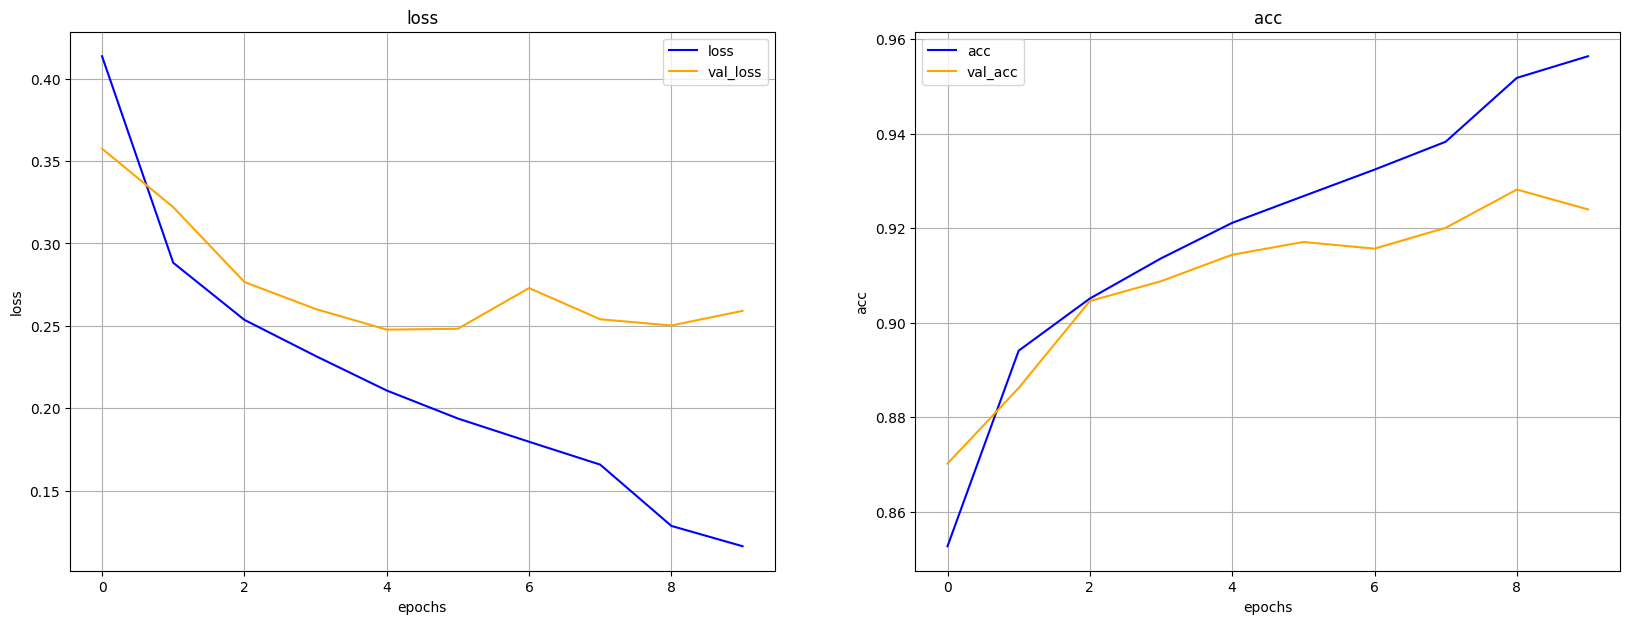

In [22]:
# 손실률과 정확도 시각화
# 학습 결과 그래프의 컬럼명
column_names = result_df.columns

# 학습데이터에 대한 필드이름
train_column_name = [column_names[0], column_names[1]]
# 검증데이터에 대한 필드이름
test_column_name = [column_names[2], column_names[3]]

# 학습 결과 그래프
fig, ax = plt.subplots(1,2, figsize=(20,7))

for i, v in enumerate(ax):
    sb.lineplot(data=result_df, x=result_df.index, y=train_column_name[i], color='blue', label=train_column_name[i], ax=v)
    sb.lineplot(data=result_df, x=result_df.index, y=test_column_name[i], color='orange', label=test_column_name[i], ax=v)
    v.set_title(train_column_name[i])
    v.set_xlabel('epochs')
    v.set_ylabel(train_column_name[i])
    v.grid()
    v.legend()

plt.show()
plt.close()

In [23]:
# 평가
evaluate1 = model.evaluate(x_train_reshape, y_train_one_hot)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test_reshape, y_test_one_hot)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))

1875/1875 [==============================] - 17s 9ms/step - loss: 0.0771 - acc: 0.9703
최종 훈련 손실률: 0.077090, 최종 훈련 정확도: 0.970283
313/313 [==============================] - 3s 9ms/step - loss: 0.2591 - acc: 0.9240
최종 검증 손실률: 0.259092, 최종 검증 정확도: 0.924000


## #08. 학습모델 적용

### 훈련데이터에 대한 예측 결과를 산정

In [25]:
result = model.predict(x_train_reshape)
data_count, case_count = result.shape
print("%d개의 훈련 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

1875/1875 [==============================] - 20s 11ms/step
60000개의 훈련 데이터가 10개의 경우의 수를 갖는다.


array([8.9790060e-14, 4.0931204e-14, 8.9115735e-15, 2.5973823e-14,
       1.4729944e-13, 9.6690104e-12, 8.6370269e-12, 3.9493435e-07,
       1.8452580e-11, 9.9999964e-01], dtype=float32)

### 가장 큰 확률 값의 인덱스를 별도 리스트로 추출

In [26]:
arg_result = np.argmax(result, axis=1)
arg_result

array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

### 데이터 비교

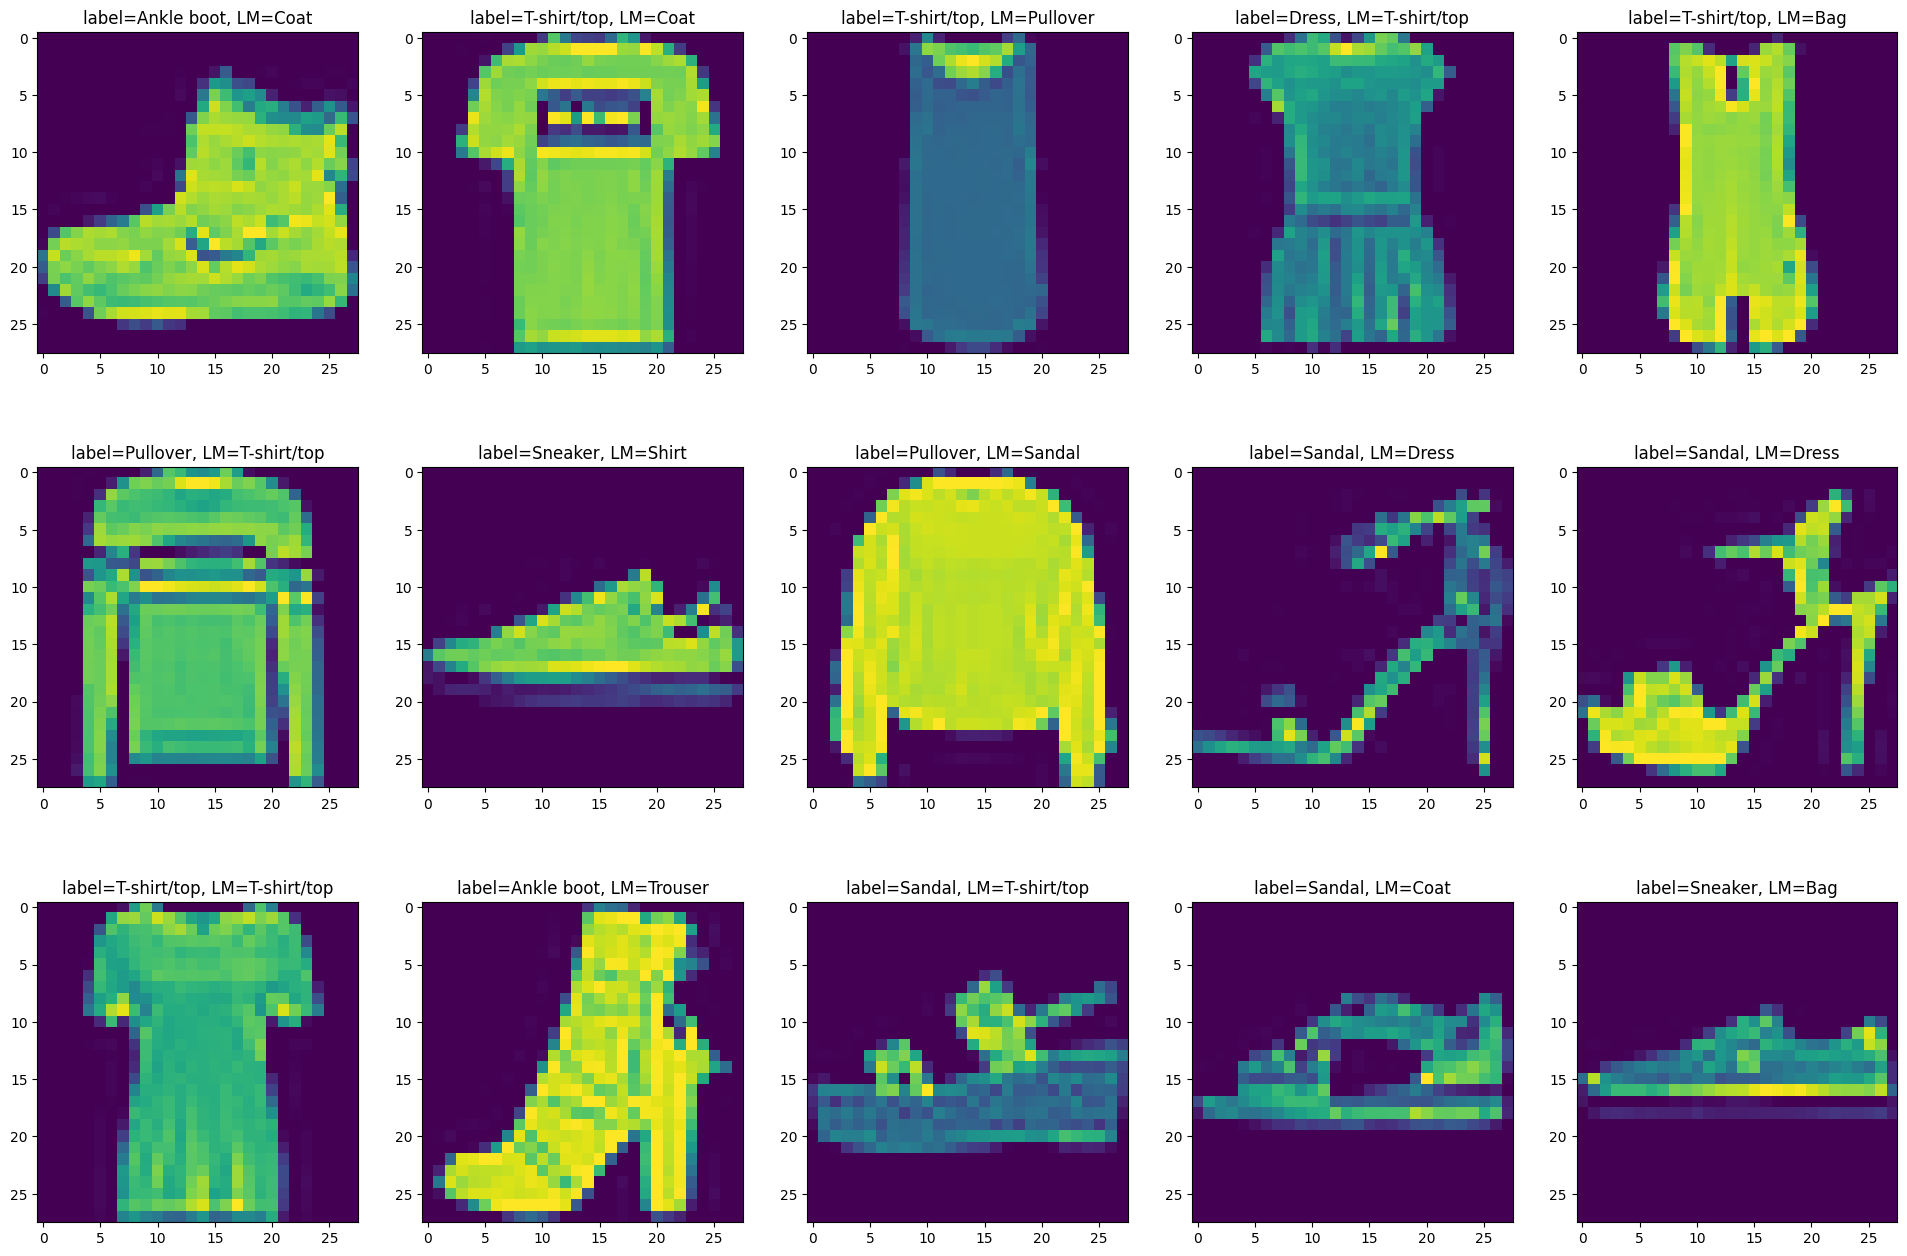

In [27]:
row = 3
col = 5
fig, ax = plt.subplots(row, col, figsize=((col+1)*4, (row+1)*4), dpi=100)

size = row*col
length = len(y_train)

for i in range(0, size):
    k = np.random.randint(length)
    train = x_train[i]
    label = y_train[i]
    ax[i//col][i%col].imshow(train)
    ax[i//col][i%col].set_title("label=%s, LM=%s" % (class_names[label], class_names[arg_result[k]]))

plt.show()
plt.close()

### 혼동행렬

In [28]:
cm = confusion_matrix(y_train, arg_result)
cmdf2 = pd.DataFrame(cm, columns=list(map(lambda x: "(r)%s" % class_names[x], range(10))), index=list(map(lambda x: "(p)%s" % class_names[x], range(10))))
cmdf2

,(r)T-shirt/top,(r)Trouser,(r)Pullover,(r)Dress,(r)Coat,(r)Sandal,(r)Shirt,(r)Sneaker,(r)Bag,(r)Ankle boot
(p)T-shirt/top,5859,0,34,22,0,0,84,0,1,0
(p)Trouser,1,5996,0,3,0,0,0,0,0,0
(p)Pullover,30,1,5790,12,91,0,76,0,0,0
(p)Dress,18,3,16,5930,19,0,13,0,1,0
(p)Coat,3,0,275,98,5502,0,122,0,0,0
(p)Sandal,0,0,0,0,0,5993,0,5,0,2
(p)Shirt,397,0,175,51,95,0,5281,0,1,0
(p)Sneaker,0,0,0,0,0,2,0,5921,0,77
(p)Bag,0,0,0,0,1,0,2,0,5997,0
(p)Ankle boot,0,0,0,0,0,1,0,51,0,5948


### 혼동행렬 히트맵

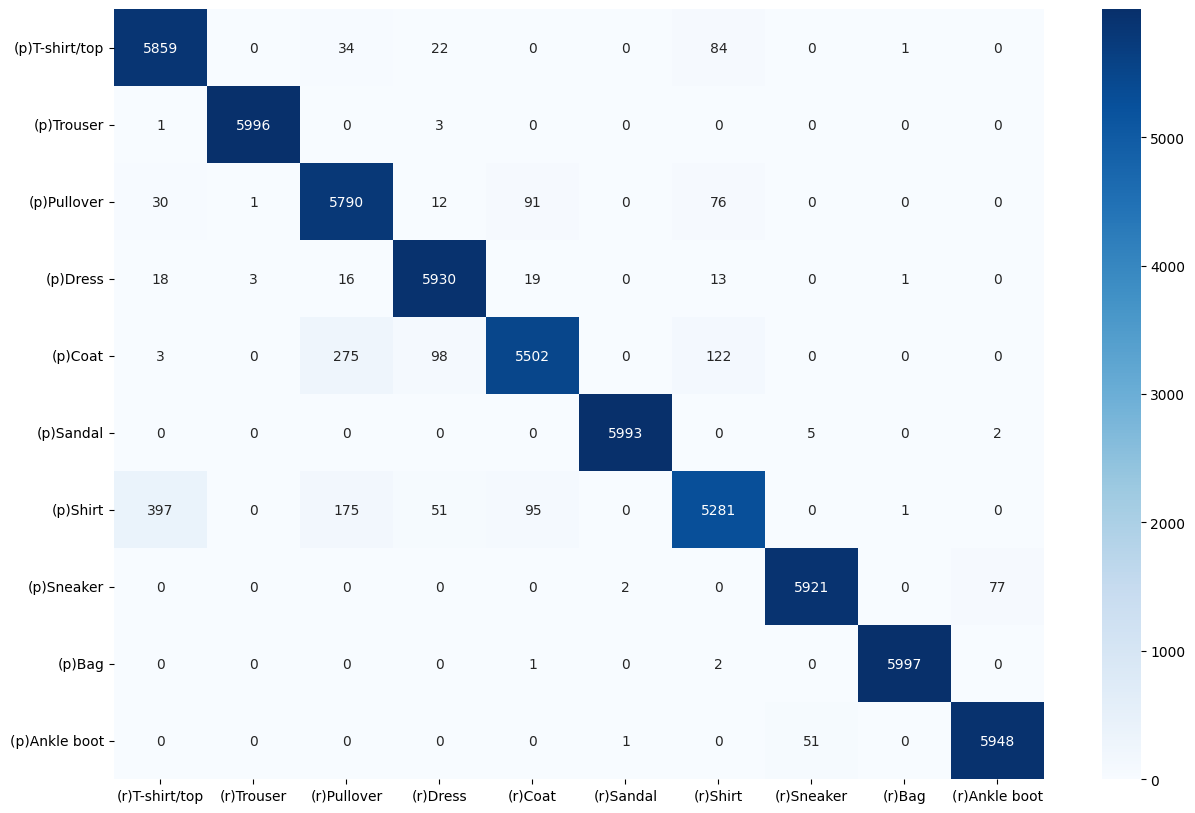

In [30]:
plt.figure(figsize=(15,10))
sb.heatmap(cmdf2, annot=True, fmt='d', cmap='Blues')
plt.show()
plt.close()

## #09. 임의의 이미지 판별하기
### 이미지 불러오기

In [32]:
from PIL import Image

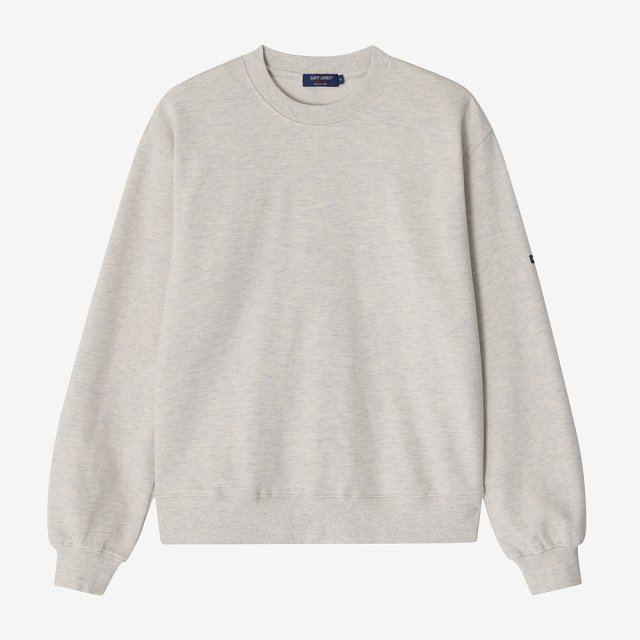

In [34]:
sample = Image.open('./res/sample.png')
sample

### 흑백 이미지로 변환
컬러이미지 (28 * 28 * 3) / 흑백이미지(28 * 28 * 1)

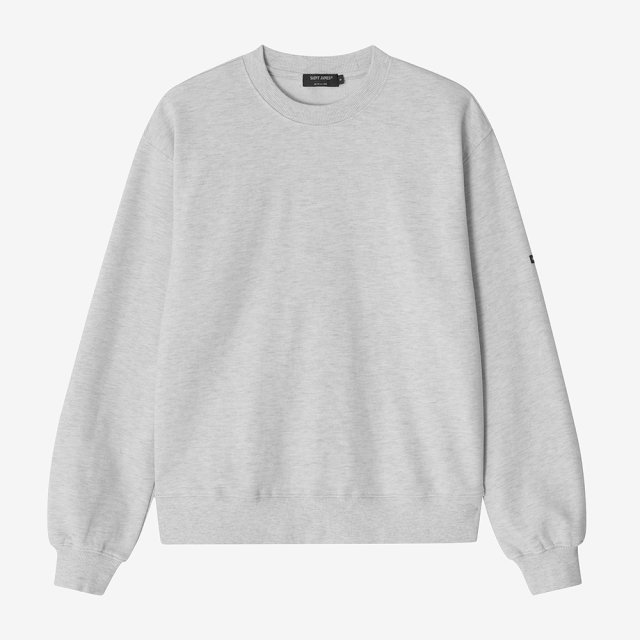

In [35]:
gray = sample.convert("L")
gray

### 이미지 크기 축소
훈련모델이 학습한 이미지의 크기는 28*28 이므로 이에 맞게 리사이즈가 필요

In [36]:
resample = gray.resize([28,28])
resample

### 이미지를 배열로 변환

In [38]:
img_array = np.array(resample)
img_array.shape

(28, 28)

In [39]:
img_array

array([[245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245,
        245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245,
        245, 245],
       [245, 245, 245, 245, 245, 245, 245, 245, 245, 246, 247, 243, 246,
        247, 247, 246, 244, 247, 246, 245, 245, 245, 245, 245, 245, 245,
        245, 245],
       [245, 245, 245, 245, 245, 245, 245, 246, 246, 237, 221, 196, 211,
        218, 217, 210, 205, 225, 239, 247, 246, 245, 245, 245, 245, 245,
        245, 245],
       [245, 245, 245, 245, 245, 245, 246, 238, 216, 202, 198, 191, 189,
        143, 127, 190, 198, 199, 201, 212, 237, 246, 245, 245, 245, 245,
        245, 245],
       [245, 245, 245, 245, 245, 246, 241, 208, 198, 201, 199, 201, 193,
        190, 195, 199, 200, 202, 202, 195, 193, 241, 246, 245, 245, 245,
        245, 245],
       [245, 245, 245, 245, 245, 247, 224, 198, 198, 202, 201, 201, 202,
        201, 200, 202, 203, 203, 204, 201, 178, 215, 247, 245, 245, 245,
        245, 245],
       [24

### 배열로 변환된 이미지 확인

In [40]:
for i in img_array:
    for j in i:
        print("%03d" % j, end="")
    print()

245245245245245245245245245245245245245245245245245245245245245245245245245245245245
245245245245245245245245245246247243246247247246244247246245245245245245245245245245
245245245245245245245246246237221196211218217210205225239247246245245245245245245245
245245245245245245246238216202198191189143127190198199201212237246245245245245245245
245245245245245246241208198201199201193190195199200202202195193241246245245245245245
245245245245245247224198198202201201202201200202203203204201178215247245245245245245
245245245245245242210201200202201201202203203204205204206204173198243245245245245245
245245245245247231204207203201202200202203202204205203204206170194234246245245245245
245245245245247216203208203202202198202204202204208205204207169193220247245245245245
245245245245244203204207202203200199203205202203209208204207168194207244245245245245
245245245246236196206209203204196199204204201202208211203207170194200235246245245245
24524524524722419320720820520319320220520520020020721220520817319

### 배경 제거
데이터의 명확한 구분을 위해 배경으로 적용되어 있는 245색상을 0으로 강제조절

In [41]:
img_array_trans = np.where(img_array == 245, 0, img_array)

for i in img_array_trans:
    for j in i:
        print("%03d" % j, end="")
    print()

000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000246247243246247247246244247246000000000000000000000000000
000000000000000000000246246237221196211218217210205225239247246000000000000000000000
000000000000000000246238216202198191189143127190198199201212237246000000000000000000
000000000000000246241208198201199201193190195199200202202195193241246000000000000000
000000000000000247224198198202201201202201200202203203204201178215247000000000000000
000000000000000242210201200202201201202203203204205204206204173198243000000000000000
000000000000247231204207203201202200202203202204205203204206170194234246000000000000
000000000000247216203208203202202198202204202204208205204207169193220247000000000000
000000000000244203204207202203200199203205202203209208204207168194207244000000000000
000000000246236196206209203204196199204204201202208211203207170194200235246000000000
00000000024722419320720820520319320220520520020020721220520817319

### 차수 재설정

In [42]:
img_array_trans.shape

(28, 28)

In [43]:
img_array_reshape = img_array_trans.reshape(1, img_array_trans.shape[0], img_array_trans.shape[1], 1)
img_array_reshape.shape

(1, 28, 28, 1)

### 준비한 데이터를 학습모델에 적용

In [44]:
result = model.predict(img_array_reshape)
data_count, case_count = result.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
result[0]

1/1 [==============================] - 0s 93ms/step
1개의 검증 데이터가 10개의 경우의 수를 갖는다.


array([4.25099861e-04, 4.86249155e-05, 1.52688235e-01, 2.47579521e-08,
       7.30050921e-01, 2.88966703e-07, 1.16784886e-01, 1.80941583e-06,
       7.91079628e-08, 1.60493041e-08], dtype=float32)

### 가장 큰 확률 값의 인덱스를 별도 리스트로 추출

In [45]:
arg_result = np.argmax(result, axis=1)
arg_result

array([4], dtype=int64)

### 데이터 비교

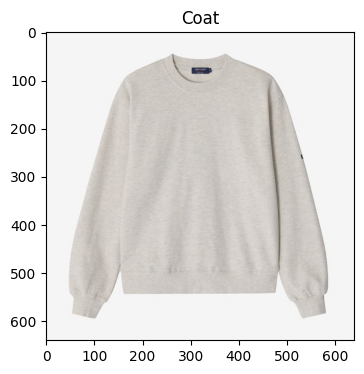

In [46]:
plt.figure(figsize=(4,4))
plt.imshow(sample)
plt.title(class_names[arg_result[0]])
plt.show()
plt.close()